##Introduction


This notebook contains the second case study of Google's Data Analytics Professional Certificate. The case study requires the analyst to follow to the steps of the data analysis process (ask, prepare, process, analyze, share,and act) using FitBit Fitness Tracker data to formulate high-level marketing recomendations for Bellabeat, a high-tech manufacturer of health-focused products for women.

##Ask

Bellabeat's business task is to unlock new growth opportunities by analyzing smart device fitness data and gaining insight into how consumers use their smart devices, which will help guide the marketing strategy for the company. To conduct this analysis, we will be examining what are some trends in smart device usage, how these trends couple apply to Bellabeat customers, and how could these trends help influence Bellabeat marketing strategy? For deliverables, we will be making three high-level recomendations for the marketing team.

##Prepare

These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03/12/2016 to 05/12/2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including second-level, minute-level, hour-level, and day-level output for heart rate, burned calories, activity intensity, MET, steps, and sleep activity. Each data point is associated with a timestamp and a user by their id.

In terms of limitations, the data consists of 30 users within a 30 day period from 2016. This makes the source outdated and the sample size too small for proper analysis. There is no demographic information to guarantee the data is representative of female users as Bellabeat's target audience.

In [1]:
#install packages 
library(tidyverse)  
library(lubridate)  
library(ggplot2)  

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#import datasets that we will use in the analysis
daily_activity <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_steps <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
daily_sleep <- read.csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

##Process

I utilized both SQL and R to clean and organize my data. We'll first look at my queries in SQL.

In SQL, I first converted the schema of the daily sleep data's date column into a useable format (from timestamp to datetime). I then utilized a JOIN operation to combine sleep data and daily activity data. I then saved and imported the dataset from SQL to RStudio


In [3]:
#import dataset from SQL Join operation
sleep_by_activity <- read.csv('../input/fitbit-fitness-tracker-daily-activity-and-sleep/sleep_by_activity.csv')

In R, I first checked my data frames to ensure clean data.

In [4]:
str(hourly_steps)
str(daily_activity)
str(daily_sleep)
str(sleep_by_activity)

'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: Factor w/ 736 levels "4/12/2016 1:00:00 AM",..: 7 1 9 11 13 15 17 19 21 23 ...
 $ StepTotal   : int  373 160 151 0 0 0 0 0 250 1864 ...
'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Factor w/ 31 levels "4/12/2016","4/13/2016",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0

I then converted the date column's data type from character to date time in each of the data frames.

In [5]:
hourly_steps$ActivityHour <- parse_date_time(hourly_steps$ActivityHour, '%m/%d/%Y %I:%M:%S %p')
daily_activity$ActivityDate <- parse_date_time(daily_activity$ActivityDate, '%m/%d/%Y')
daily_sleep$SleepDay <- parse_date_time(daily_sleep$SleepDay, '%m/%d/%Y %I:%M:%S %p')
sleep_by_activity$SleepDay <- parse_date_time(sleep_by_activity$SleepDay, '%m/%d/%Y')

To analyze the data by time of day (i.e. 1:00 AM, 2:00 AM, etc.), I then created a new column for time of day for the hourly steps data frame.

In [6]:
hourly_steps$Time <- format(as.POSIXlt(hourly_steps$ActivityHour), "%H:%M:%S")

To analyze the data by day of the week (i.e. Monday, Tuesday, etc.), I added a column for the day of the week for each observation.

In [7]:
hourly_steps$day_of_week <- format(as.Date(hourly_steps$ActivityHour), "%A")
hourly_steps$day_of_week <- ordered(hourly_steps$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

daily_activity$day_of_week <- format(as.Date(daily_activity$ActivityDate), "%A")
daily_activity$day_of_week <- ordered(daily_activity$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

sleep_by_activity$day_of_week <- format(as.Date(sleep_by_activity$SleepDay), "%A")
sleep_by_activity$day_of_week <- ordered(sleep_by_activity$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

Lastly, I created a column for the total minutes recorded per day for the daily activity data frame.

In [8]:
daily_activity$total_minutes <- rowSums(daily_activity [,11:14])

##Analyze

I started my analysis by aggregating some data to find some averages. 

I first focused on how much time people dedicated to different levels of activity each day, from sedentary to very active.

In [9]:
activity_distribution_per_day <- aggregate(cbind(daily_activity$total_minutes, daily_activity$SedentaryMinutes, daily_activity$LightlyActiveMinutes, daily_activity$FairlyActiveMinutes, daily_activity$VeryActiveMinutes) ~ daily_activity$day_of_week, FUN = mean)
write_csv(activity_distribution_per_day, file = "~/Desktop/activity_distribution_per_day.csv")

Warning message in open.connection(file, "wb"):
“cannot open file '/root/Desktop/activity_distribution_per_day.csv': No such file or directory”


ERROR: Error in open.connection(file, "wb"): cannot open the connection


Lastly, I focused on the average number of steps per hour of the day.

In [10]:
steps_per_hour <- aggregate(hourly_steps$StepTotal ~ hourly_steps$Time, FUN = mean)
write_csv(steps_per_hour, file = "~/Desktop/steps_per_hour.csv")

Warning message in open.connection(file, "wb"):
“cannot open file '/root/Desktop/steps_per_hour.csv': No such file or directory”


ERROR: Error in open.connection(file, "wb"): cannot open the connection


##Share

I then utlized the ggplot2 package to build some data visualizations for analysis. This will help stakeholders get a better idea of the analysis before I present my recommendations.

The first plot revelaed the relationship between daily average "active" minutes (lightly + fairly + very active minutes) and daily average calories burned.

`geom_smooth()` using formula 'y ~ x'



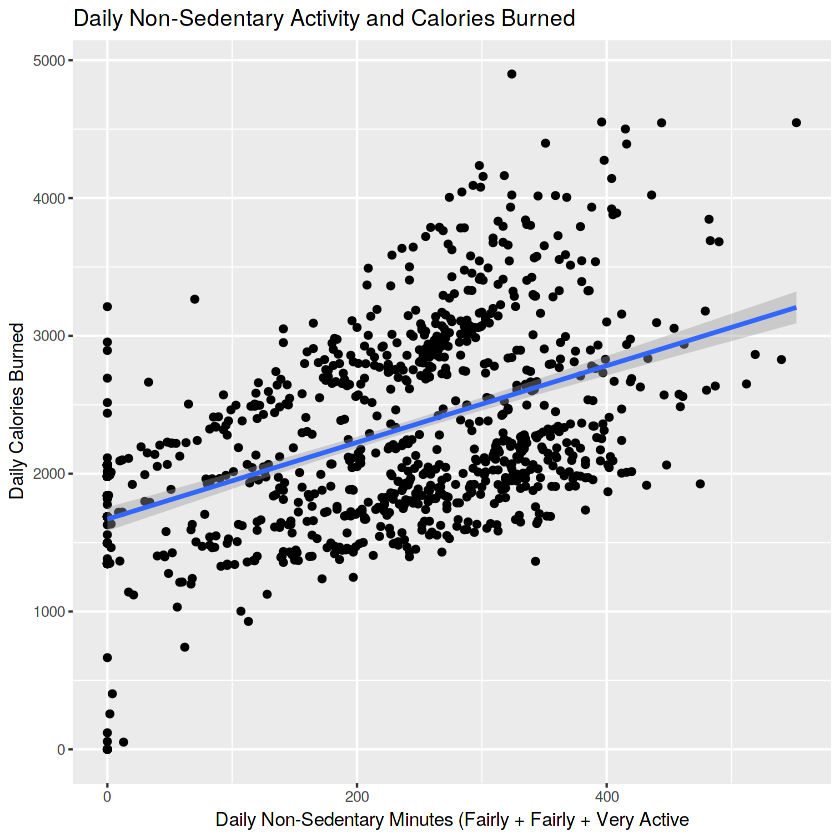

In [11]:
ggplot(data = daily_activity, aes(x= VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes, y = Calories)) + geom_point() + geom_smooth(method  = "lm") + labs(title = "Daily Non-Sedentary Activity and Calories Burned") + xlab("Daily Non-Sedentary Minutes (Fairly + Fairly + Very Active") + ylab("Daily Calories Burned")

I compared this plot to another plot that looked at the relationship between daily average sedentary minutes and daily average calories burned.

`geom_smooth()` using formula 'y ~ x'



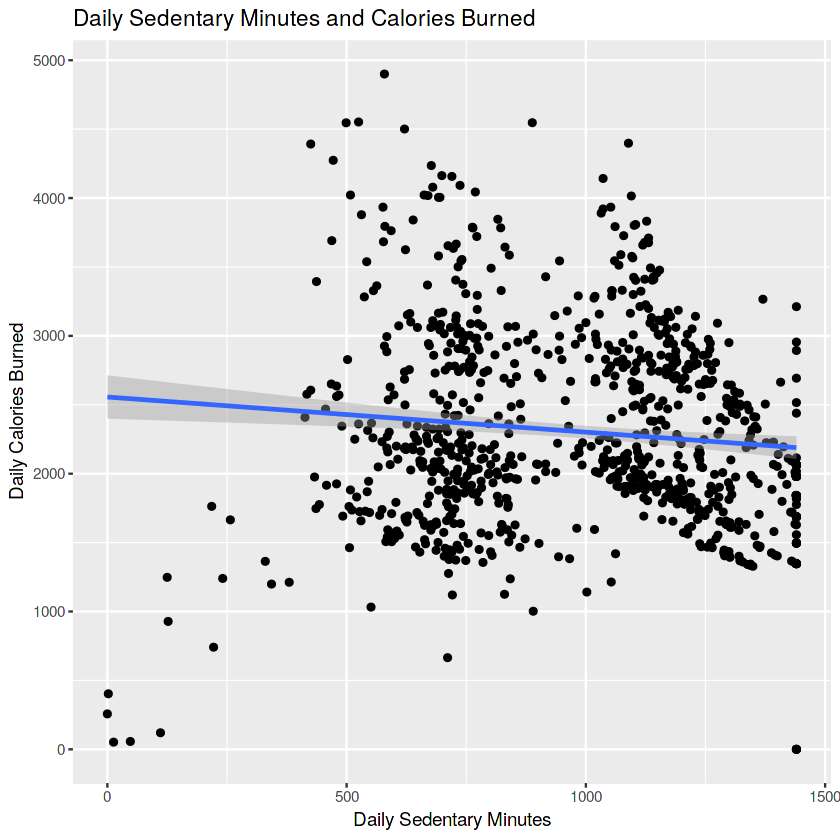

In [12]:
ggplot(data = daily_activity, aes(x = SedentaryMinutes, y = Calories)) + geom_point() + geom_smooth(method = "lm") + labs(title = "Daily Sedentary Minutes and Calories Burned") + xlab("Daily Sedentary Minutes") + ylab("Daily Calories Burned")

I then wanted to factor in how the daily average minutes asleep related to the daily average calories burned.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



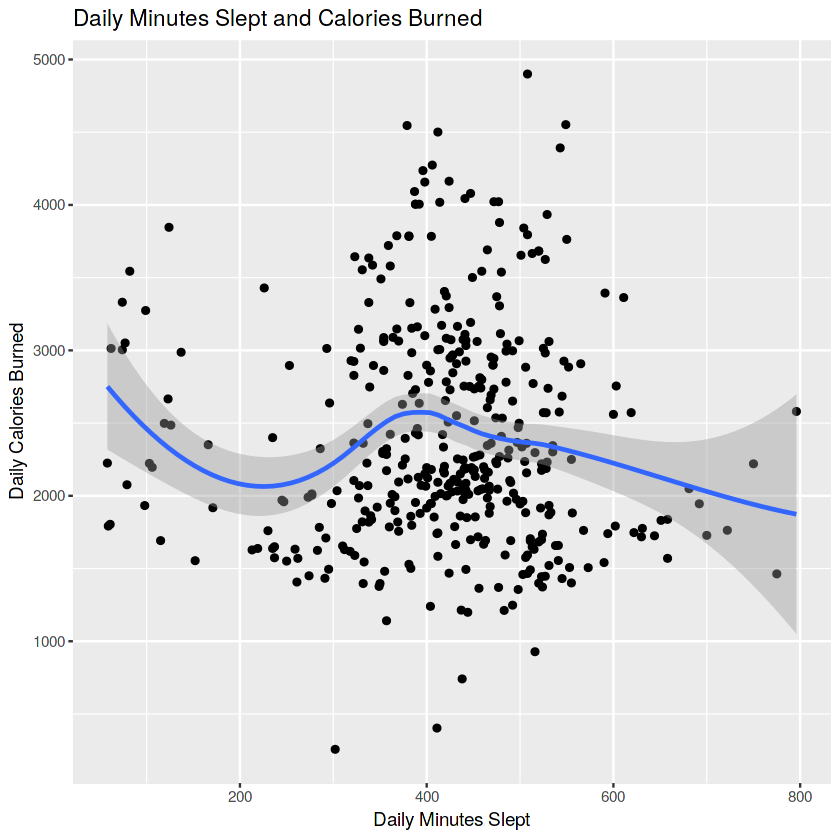

In [13]:
ggplot(data = sleep_by_activity, aes(x = TotalMinutesAsleep, y = Calories)) + geom_point() + geom_smooth() + labs(title = "Daily Minutes Slept and Calories Burned") + xlab("Daily Minutes Slept") + ylab("Daily Calories Burned")

Then, I examined how the daily average of minutes slept realted to the daily average of fairly active and very active minutes.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



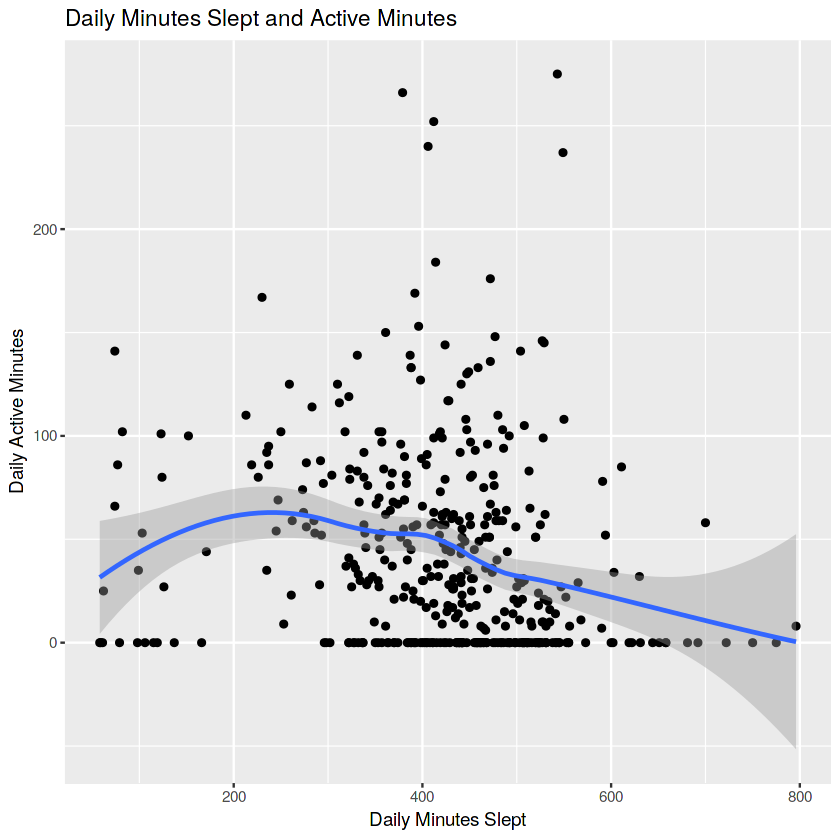

In [14]:
ggplot(data = sleep_by_activity, aes(x = TotalMinutesAsleep, y = VeryActiveMinutes + FairlyActiveMinutes)) + geom_point() + geom_smooth() + labs(title = "Daily Minutes Slept and Active Minutes") + xlab("Daily Minutes Slept") + ylab("Daily Active Minutes")

Lastly, I looked at the how the daily average of minutes slept related to the the the daily average of sedentary minutes.Before we move forward, let's order the day_of_week column into the correct order.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



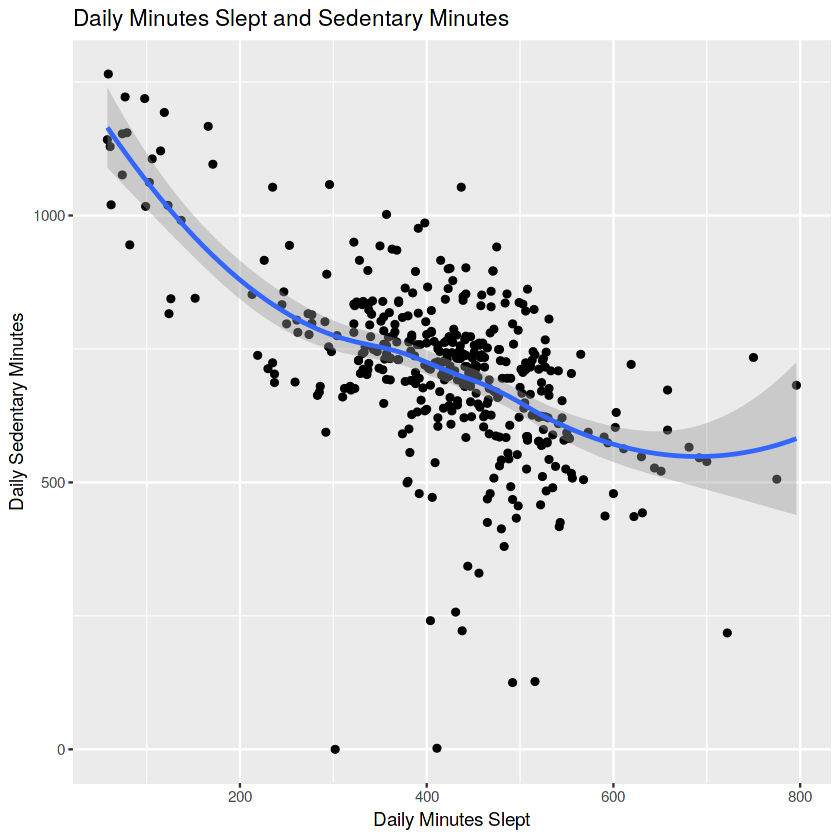

In [15]:
ggplot(data = sleep_by_activity, aes(x = TotalMinutesAsleep, y = SedentaryMinutes)) + geom_point() + geom_smooth() + labs(title = "Daily Minutes Slept and Sedentary Minutes") + xlab("Daily Minutes Slept") + ylab("Daily Sedentary Minutes")

##Act

For the last step of the data analysis process, I will present some key findings and then share three high-level recomendations to the marketing team.

###Key Findings:
1. There is a clear pattern between the amount of sleep and staying active and thus burning calories, although not many smart device users are tracking their sleep.
2. The longer someone stay sedentary, the less calories they will burn throughout the day.
3. On average, fitness tracker users are spending 80% of their day in a sedentary state.
4. People are walking more around 4 to 7 PM everyday and less active from 12 to 5 AM.

###Recommendations
1. Encouraging users to track their sleep to encourage a health lifestyle
2. Advertise the connection between getting enough activity each day and maintaining proper health and wellness goals.
3. Focus advertising to people who are more active in the evening, likely people who work during the day.